In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the Titanic dataset (ensure the dataset is in the current directory)
data = pd.read_csv('/content/Titanic-Dataset.csv')

# Step 2: Data Preprocessing
# Handle missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data['Fare'].fillna(data['Fare'].median(), inplace=True)

# Drop columns that are not useful for prediction (Name, Ticket, Cabin)
data = data.drop(['Name', 'Ticket', 'Cabin'], axis=1)

# Encode categorical variables (Sex and Embarked)
le_sex = LabelEncoder()
data['Sex'] = le_sex.fit_transform(data['Sex'])

le_embarked = LabelEncoder()
data['Embarked'] = le_embarked.fit_transform(data['Embarked'])

# Step 3: Split the data into features (X) and target (y)
X = data.drop(['Survived', 'PassengerId'], axis=1)
y = data['Survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the model (Random Forest Classifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')



<ipython-input-2-478731b0d94e>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
<ipython-input-2-478731b0d94e>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

Accuracy: 82.12%


                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi) -2019.0  109 min            Drama   
2                         #Homecoming -2021.0   90 min   Drama, Musical   
3                             #Yaaram -2019.0  110 min  Comedy, Romance   
4                   ...And Once Again -2010.0  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

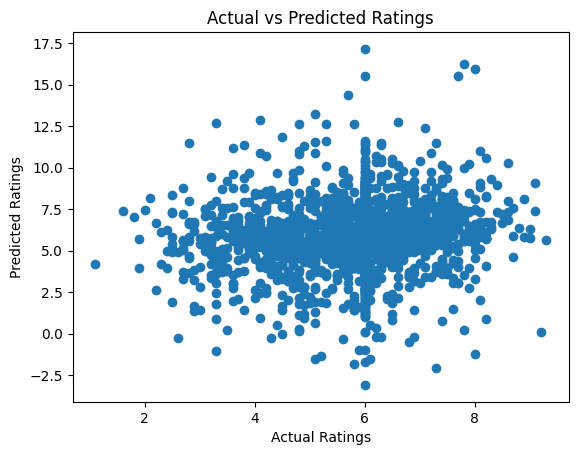

[5.77241559 6.03170146]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
# Load the dataset (Assume CSV file is provided)
# Specify the encoding as 'latin-1' or 'ISO-8859-1'
data = pd.read_csv('/content/IMDb Movies India.csv', encoding='latin-1')  # Replace with the actual path to your dataset
print(data.head())  # Check the first few rows of the dataset
# Handle missing values for categorical features (e.g., fill with 'Unknown')
data['Genre'] = data['Genre'].fillna('Unknown')
data['Director'] = data['Director'].fillna('Unknown')
data['Actor 1'] = data['Actor 1'].fillna('Unknown')
data['Actor 2'] = data['Actor 2'].fillna('Unknown')
data['Actor 3'] = data['Actor 3'].fillna('Unknown')
data['Rating'] = data['Rating'].fillna(data['Rating'].median())  # Impute missing Rating with median

# Check for any remaining missing values
print(data.isnull().sum())
# Select features (X) and target variable (y)
X = data[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']]  # Using categorical columns as features
y = data['Rating']  # Rating is the target variable
# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a column transformer for one-hot encoding the categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'])
    ])

# Create a pipeline with preprocessing and a regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model on the training data
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Optionally, plot the predicted vs actual ratings
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.show()
# Example: Predicting ratings for new movies
new_movies = pd.DataFrame({
    'Genre': ['Action', 'Comedy'],
    'Director': ['Director1', 'Director2'],
    'Actor 1': ['Actor1', 'Actor2'],
    'Actor 2': ['Actor3', 'Actor4'],
    'Actor 3': ['Actor5', 'Actor6']
})

# Predict the ratings for the new movies
new_predictions = model.predict(new_movies)
print(new_predictions)

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset (taking the CSV file path as user input)
file_path = input("Please enter the path to the Iris dataset CSV file: ")

# Read the dataset into a pandas DataFrame
data = pd.read_csv('/content/IRIS.csv')

# Step 2: Check for missing values
print(data.isnull().sum())  # Check for missing values in each column

# Step 3: Preprocess the data
# Encode the 'species' column (target variable) into numeric values
label_encoder = LabelEncoder()
data['species'] = label_encoder.fit_transform(data['species'])

# Step 4: Split the dataset into features (X) and target (y)
X = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]  # Features
y = data['species']  # Target variable

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Feature scaling (Optional, but often improves model performance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform the training data
X_test = scaler.transform(X_test)  # Only transform the test data

# Step 6: Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = model.predict(X_test)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Display the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Step 9: Use the model to make predictions on new data (Example input)
# Example: Predicting the species for a new flower with specific measurements
new_data = [[5.1, 3.5, 1.4, 0.2]]  # Example feature values (sepal_length, sepal_width, petal_length, petal_width)
new_data_scaled = scaler.transform(new_data)  # Scale the new data using the same scaler
prediction = model.predict(new_data_scaled)
predicted_species = label_encoder.inverse_transform(prediction)  # Convert numeric prediction back to species name
print(f"Predicted species for the new flower: {predicted_species[0]}")


Please enter the path to the Iris dataset CSV file: /content/IRIS.csv
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
Accuracy: 1.0000

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Predicted species for the new flower: Iris-setosa


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset (taking the CSV file path as user input)
file_path = input("Please enter the path to the Sales dataset CSV file: ")

# Read the dataset into a pandas DataFrame
data = pd.read_csv('/content/advertising.csv')

# Step 2: Explore the dataset
print(data.head())  # Display the first few rows to understand the structure

# Step 3: Check for missing values (if any)
print("\nMissing values in the dataset:")
print(data.isnull().sum())

# Step 4: Split the data into features (X) and target (y)
X = data[['TV', 'Radio', 'Newspaper']]  # Features: Advertising expenditures
y = data['Sales']  # Target: Sales

# Step 5: Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Feature scaling (Optional, but often helps improve model performance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform the training data
X_test = scaler.transform(X_test)  # Only transform the test data

# Step 7: Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 8: Make predictions on the test data
y_pred = model.predict(X_test)

# Step 9: Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'\nMean Squared Error: {mse:.4f}')
print(f'R-squared: {r2:.4f}')

# Step 10: Predict sales for new data (example)
new_data = [[150, 30, 20]]  # Example input: TV, Radio, Newspaper expenditures
new_data_scaled = scaler.transform(new_data)  # Scale the new data
predicted_sales = model.predict(new_data_scaled)
print(f"\nPredicted sales for new data (TV=150, Radio=30, Newspaper=20): {predicted_sales[0]:.2f}")


Please enter the path to the Sales dataset CSV file: /content/advertising.csv
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

Missing values in the dataset:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Mean Squared Error: 2.9078
R-squared: 0.9059

Predicted sales for new data (TV=150, Radio=30, Newspaper=20): 16.01


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE  # For oversampling the minority class (fraudulent transactions)

# Step 1: Load the dataset (taking CSV file path as user input)
file_path = input("Please enter the path to the credit card transaction dataset CSV file: ")

# Read the dataset into a pandas DataFrame
data = pd.read_csv('/content/creditcard.csv')

# Step 2: Check the first few rows of the dataset to understand its structure
print(data.head())

# Step 3: Preprocess and normalize the data

# Handle any missing values (if necessary)
# For simplicity, we'll drop any rows with missing values
data = data.dropna()

# Split the data into features (X) and target variable (y)
X = data.drop(columns=['Class'])  # All columns except the target 'class'
y = data['Class']  # 'class' is the target variable (1 for fraudulent, 0 for genuine)

# Step 4: Feature scaling (since the dataset contains numerical values, we standardize them)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Handle class imbalance using SMOTE (Synthetic Minority Oversampling Technique)
# This will oversample the minority class (fraudulent transactions) to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Step 6: Split the resampled dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 7: Train the model - We can use either Random Forest or Logistic Regression
# Here, we'll use RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 8: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 9: Evaluate the model performance using precision, recall, and F1-score
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 10: Additional metrics (Precision, Recall, F1-Score for fraudulent class)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')


Please enter the path to the credit card transaction dataset CSV file: /content/creditcard.csv
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817

KeyboardInterrupt: 